In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0] 
bias = 2

output = inputs[0] * weights[0] + inputs[1] * weights[1] + inputs[2] * weights[2] + inputs[3] * weights[3] + bias
output

4.8

In [3]:
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2, 3, 0.5]

np.dot(weights, inputs) + biases


array([4.8  , 1.21 , 2.385])

In [4]:
np.array([1, 2]) * [3, 4]

array([3, 8])

In [5]:
inputs = [
    [1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
]

np.dot(inputs, np.array(weights).T) + biases

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

In [6]:
weights2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]

biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
layer2_outputs

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

In [28]:
np.random.seed(0)
X = [
    [1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
]

class Layer_Dense:
    def  __init__(self, n_inputs, n_neurons) -> None:
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(
    len(X[0]), # 4
    7)
layer1.forward(X)
layer1.output


layer2 = Layer_Dense(
    7,
    2)
layer2.forward(layer1.output)
layer2.output

AttributeError: 'list' object has no attribute 'astype'

In [8]:
np.zeros((3,1))

array([[0.],
       [0.],
       [0.]])

## Hidden Layer Activation

 - [How to turn integers into Fibonacci coding efficiently?](https://stackoverflow.com/q/37479718/3563013)
 - [The Magic of ReLU - `max(0, x)`](https://youtu.be/gmjzbpSVY1A?t=484)

In [9]:
# %pip install nnfs

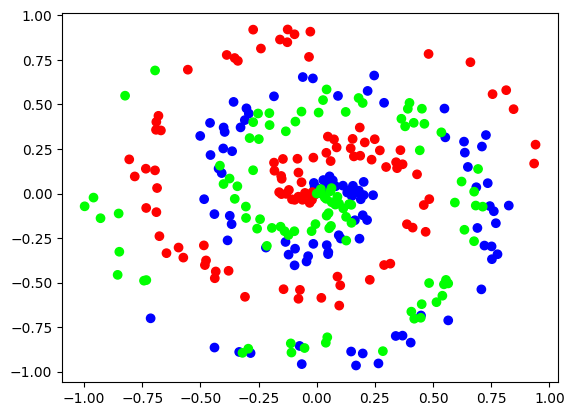

In [10]:
# https://gist.github.com/Sentdex/454cb20ec5acf0e76ee8ab8448e6266c
# https://cs231n.github.io/neural-networks-case-study/
from nnfs.datasets import spiral_data

X, y = spiral_data(100, 3)
plt.scatter(X[:,0], X[:,1], c=y, cmap="brg")

In [11]:
X

array([[-0.        ,  0.        ],
       [ 0.00889146,  0.00479295],
       [-0.00106629,  0.02017386],
       [ 0.00254226,  0.0301962 ],
       [-0.00891028,  0.03940931],
       [ 0.03936642,  0.03163929],
       [-0.01209333,  0.05938726],
       [ 0.03996509,  0.05832908],
       [ 0.02849289,  0.07561813],
       [ 0.08112342,  0.04102992],
       [ 0.06919889,  0.07358365],
       [ 0.05528555,  0.09638043],
       [ 0.11288769,  0.04414462],
       [ 0.13118892,  0.0057102 ],
       [ 0.14033888,  0.01740573],
       [ 0.15082343, -0.01446146],
       [ 0.15568329,  0.04338775],
       [ 0.17161203,  0.00600805],
       [ 0.18110107,  0.01613235],
       [ 0.18919729, -0.03220809],
       [ 0.20183491, -0.0086504 ],
       [ 0.20183304,  0.06525975],
       [ 0.1640833 , -0.14986456],
       [ 0.19787334, -0.12173835],
       [ 0.24224602, -0.00929395],
       [ 0.09482623, -0.23404484],
       [ 0.21648499, -0.14868357],
       [ 0.1032707 , -0.25241895],
       [-0.0144845 ,

In [12]:
import nnfs

nnfs.init()

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)


layer1 = Layer_Dense(2, 5)
activation1 = Activation_ReLU()
layer1.forward(X)
print(layer1.output)
activation1.forward(layer1.output)
print(activation1.output)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.00110009  0.00081117  0.0007977   0.00194301  0.00185733]
 [-0.00215965  0.00187403 -0.00040971 -0.00044718  0.0006292 ]
 ...
 [-0.19007577  0.03784086 -0.07845412 -0.16281527 -0.10137865]
 [-0.19895564  0.01922151 -0.08891971 -0.19022512 -0.13125953]
 [-0.16893736 -0.04673052 -0.0965353  -0.22277085 -0.18922083]]
[[0.         0.         0.         0.         0.        ]
 [0.00110009 0.00081117 0.0007977  0.00194301 0.00185733]
 [0.         0.00187403 0.         0.         0.0006292 ]
 ...
 [0.         0.03784086 0.         0.         0.        ]
 [0.         0.01922151 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


# Softmax Activation

For output neurons, we don't use normal activation values

We exponentiate and then normalize (get probability - like percentage)

In [13]:
import math

layer_outputs = [4.8, 1.21, 2.385]
E = math.e

exp_values = []
for output in layer_outputs:
    exp_values.append(E**output)

norm_values = []
for value in exp_values:
    norm_values.append(value / sum(exp_values))

print(norm_values)
print(sum(norm_values))

[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


Using Numpy

In [14]:
exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values)

print(norm_values)
print(sum(norm_values))

[0.89528266 0.02470831 0.08000903]
0.9999999999999999


In [15]:
layer_outputs = [
    [4.8, 1.21, 2.385],
    [8.9, -1.81, 0.2],
    [1.41, 1.051, 0.026]
]

exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)
print(norm_values)
print(sum(norm_values))

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]
[2.40819096 0.38306452 0.20874452]


In [35]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_ReLU()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(dense2.output[:5])
print(activation2.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 6.7541305e-07 -3.3742191e-07 -4.0220743e-07]
 [ 1.3356894e-06 -6.7111648e-07 -8.0029457e-07]
 [ 2.1880355e-06 -1.0415991e-06 -1.2372542e-06]
 [ 2.9746509e-06 -1.3900799e-06 -1.6488993e-06]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.7541305e-07 0.0000000e+00 0.0000000e+00]
 [1.3356894e-06 0.0000000e+00 0.0000000e+00]
 [2.1880355e-06 0.0000000e+00 0.0000000e+00]
 [2.9746509e-06 0.0000000e+00 0.0000000e+00]]


# Loss Function

[One hot encoding](https://youtu.be/dEXPMQXoiLc?t=310)

L = log(yi, k)

In [17]:
import math

softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]
loss = -(
    math.log(softmax_output[0]) * target_output[0] + 
    math.log(softmax_output[1]) * target_output[1] + 
    math.log(softmax_output[2]) * target_output[2]
)
print(loss)
print(-math.log(softmax_output[0]))

0.35667494393873245
0.35667494393873245


In [18]:
softmax_outputs = np.array([
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]
])
class_targets = [0, 1, 1]
print(-np.log(softmax_outputs[[0,1,2], [class_targets]]))

[[0.35667494 0.69314718 0.10536052]]


In [30]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossEntropy(Loss):
    def forward(seld, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [36]:
nnfs.init()

X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output, y)
loss

1.0986104